# Machine Learning Spring 2025

> **Project 1 - Temperature Prediction**<br><br>Team: ST_ML2025_2

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import math

In [32]:
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

In [33]:
plt.rcParams['font.family'] = 'NanumGothic' # 예시: 나눔고딕
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지


In [34]:
train_df = pd.read_csv("input/train_dataset.csv")
test_df = pd.read_csv("input/test_dataset.csv")

# Dataset 분석

주어진 데이터셋의 구성은 다음과 같다.

- `train_dataset.csv`: 동두천, 서울, 강화, 인천, 이천, 양평 관측소의 2019-2024년 데이터셋
- `test_dataset.csv`: 파주, 수원 관측소 데이터셋
- `station_info.csv`: 기상 관측소별 정보

In [35]:
train_df.sample(10)

,id,station,station_name,date,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,...,wind_speed_23,wind_speed_3,wind_speed_4,wind_speed_5,wind_speed_6,wind_speed_7,wind_speed_8,wind_speed_9,climatology_temp,target
7303,11682,201,강화,01-05,10.0,10.0,0.0,0.0,0.0,0.0,...,1.4,0.9,1.6,1.1,1.2,1.7,0.8,2.1,-2.625000,-5.575000
11921,16300,203,이천,09-07,10.0,10.0,10.0,10.0,10.0,10.0,...,1.5,0.9,0.9,0.9,0.9,0.8,0.6,0.6,22.696429,-0.496429
8011,12390,201,강화,12-16,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,2.5,2.1,2.6,2.4,1.9,1.7,1.8,-3.262500,-5.037500
6449,8637,112,인천,09-02,0.0,3.0,8.0,8.0,6.0,7.0,...,2.5,1.3,1.1,1.9,2.0,2.1,2.4,2.5,23.626786,3.573214
10635,15014,202,양평,02-27,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.9,0.7,1.2,1.4,1.5,2.4,1.4,4.578571,0.521429
8927,13306,202,양평,06-22,7.0,1.0,0.0,0.0,0.0,0.0,...,1.4,0.8,0.7,1.0,0.6,0.5,1.2,1.7,23.437500,0.262500
2985,5173,108,서울,03-09,0.0,0.0,0.0,0.0,0.0,0.0,...,1.7,0.9,1.9,1.9,2.5,1.0,1.2,1.5,6.744643,2.055357
4103,6291,108,서울,03-31,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.5,1.3,1.1,1.0,0.8,2.2,1.2,11.576786,0.623214
271,271,98,동두천,09-29,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.6,0.6,1.1,0.4,0.3,0.3,0.5,19.080357,0.519643
4638,6826,112,인천,09-18,0.0,9.0,0.0,1.0,0.0,0.0,...,4.1,4.0,4.0,2.8,4.2,3.9,3.1,3.9,22.046429,-2.846429


In [36]:
train_df.describe()

,id,station,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,cloud_cover_14,cloud_cover_15,...,wind_speed_23,wind_speed_3,wind_speed_4,wind_speed_5,wind_speed_6,wind_speed_7,wind_speed_8,wind_speed_9,climatology_temp,target
count,13132.000000,13132.000000,12945.000000,12920.000000,12916.000000,12926.000000,12931.000000,12926.000000,12919.000000,12938.000000,...,13122.000000,13120.000000,13116.000000,13112.000000,13119.000000,13120.000000,13125.000000,13127.000000,13132.000000,13132.000000
mean,9484.110493,153.980658,2.915798,3.022291,3.126742,3.092063,3.046400,3.035046,2.992182,2.911115,...,-0.032754,-2.491814,-0.234637,-1.011882,-4.068389,-7.119787,-10.073272,-9.119029,12.658557,0.221979
std,5311.954253,48.183220,3.646779,3.652165,3.659422,3.589739,3.512063,3.483002,3.462070,3.440298,...,123.464434,195.197628,123.489868,151.258218,230.949420,289.453706,337.895538,326.432094,10.023504,2.960544
min,0.000000,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-4.487500,-12.864286
25%,5470.750000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.600000,0.400000,0.400000,0.400000,0.400000,0.400000,0.500000,0.700000,3.292857,-1.643052
50%,8753.500000,112.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.200000,1.000000,0.900000,0.900000,0.900000,0.900000,1.000000,1.300000,12.842857,0.157143
75%,14227.250000,202.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,6.000000,6.000000,...,2.100000,1.900000,1.900000,1.800000,1.800000,1.800000,2.000000,2.200000,22.271429,2.045536
max,17510.000000,203.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.700000,11.300000,9.500000,10.600000,12.400000,11.100000,11.300000,9.400000,28.455357,11.778571


In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13132 entries, 0 to 13131
Columns: 342 entries, id to target
dtypes: float64(338), int64(2), object(2)
memory usage: 34.3+ MB


## Feature 분석

### Feature 분류 및 설명

In [38]:
def search_time_based_feature_names(df):
    "각 시간별로 구성된 feature들(e.g. 'cloud_cover_0', 'cloud_cover_1' ...)에 대해 각각의 고유한 이름(e.g. 'cloud_cover')을 찾는다."

    time_based_features_pattern = re.compile(r"^(.*)_(\d{1,2})$")
    searched_time_based_feature_names = set()

    for column in df.columns:
        match = time_based_features_pattern.match(column)
        if match:
            feature_name, hour = match.groups()
            hour = int(hour)
            searched_time_based_feature_names.add(feature_name)

    return searched_time_based_feature_names

time_based_feature_names = search_time_based_feature_names(train_df)

print(len(time_based_feature_names))
print(time_based_feature_names)

14
{'wind_direction', 'local_pressure', 'sea_level_pressure', 'wind_speed', 'min_cloud_height', 'vapor_pressure', 'dew_point', 'surface_temp', 'cloud_cover', 'snow_depth', 'sunshine_duration', 'visibility', 'precipitation', 'humidity'}


train dataset에 있는 feature를 특성에 따라 다음과 같은 카테고리별로 정리하였다.

1. Data 식별
   - `id`: 순서(identical)
   - `station`: 지상관측소 번호(98: "동두천", 201: "강화" 등)
   - `station_name`: 지상관측소 이름("동두천", "서울", "강화" 등)
   - `date`: 날짜(월-일 형식, 1월 29일은 "01-29"로 표기)

2. 구름 관련 feature
    - `cloud_cover_[0-23]`: 증하층운량(10분위, 0~10)
    - `min_cloud_height_[0-23]`: 시간별 최저운고(100m 단위)

3. 온도 관련 feature
    - `dew_point_[0-23]`: 시간별 이슬점 온도(°C)
    - `surface_temp_[0-23]`: 시간별 지면온도(°C)
    - `climatology_temp`: 해당 날짜의 평균 기온(°C) (7년 동안 평균)

4. 습도 관련 feature
    - `humidity_[0-23]`: 시간별 습도(%)
    - `vapor_pressure_[0-23]`: 시간별 증기압(hPa)
    - `percipitation_[0-23]`: 시간별 강수량(mm)
    - `snow_depth_[0-23]`: 시간별 적설(cm)

5. 기압 관련 feature
    - `local_pressure_[0-23]`: 시간별 현지기압(hPa)
    - `sea_level_pressure_[0-23]`: 시간별 해면기압(hPa)

6. 가시성 관련 feature
    - `visibility_[0-23]`: 시간별 시정(10m 단위)
    - `sunshine_duration_[0-23]`: 시간별 일조(hr)

7. 바람 관련 feature
    - `wind_speed_[0-23]`: 시간별 풍속(m/s)
    - `wind_direction_[0-23]`: 시간별 풍향(도 단위)

8. target feature
    - `target`: 시간별 기온(°C, 다음날 평균 기온(°C)에서 `climatology_temp`를 뺀 값)


### 결측치 패턴

1. `-9999`: 관측소 기계에서 감지한 결측치 또는 이상치
2. `NaN`:
    - `sunshine_duration`: 야간 시간대(0, 1, 2, 3, 4, 5, 22, 23시), 즉 해가 없는 시간대
    - `snow_depth`: 눈이 오지 않은 경우
    - `precipitation`: 비가 오지 않은 경우




### Hourly Feature별 분석

#### Temperature-related Features

In [39]:
temp_prefixes = ['dew_point', 'surface_temp']
temp_cols = [col + "_" + str(hour) for col in temp_prefixes for hour in range(24)]
temp_cols.append('climatology_temp')

In [40]:
# In[1]: Imports and Basic Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 기본 설정
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")
try:
    plt.rcParams['font.family'] = 'NanumGothic'
except Exception as e:
    print(f"나눔고딕 폰트 설정 실패: {e}. 기본 폰트 사용됨.")
plt.rcParams['axes.unicode_minus'] = False

# 변수 단위 정보 (나중에 상세 EDA에서 활용)
VARIABLE_UNITS = {
    'cloud_cover': '(10분위)', 'dew_point': '(°C)', 'humidity': '(%)',
    'local_pressure': '(hPa)', 'min_cloud_height': '(100m)', 'precipitation': '(mm)',
    'sea_level_pressure': '(hPa)', 'snow_depth': '(cm)', 'sunshine_duration': '(hr)',
    'surface_temp': '(°C)', 'vapor_pressure': '(hPa)', 'visibility': '(10m)',
    'wind_speed': '(m/s)', 'wind_direction': '(°)',
    'climatology_temp': '(°C)', 'target': '(°C, 편차)'
}
def get_unit(column_name_or_base):
    for base_key, unit_value in VARIABLE_UNITS.items():
        if base_key in column_name_or_base:
            return unit_value
    return ""


In [41]:
# In[2]: Load Data
# 실제 데이터 파일 경로로 수정해야 합니다.
# 예시: train_df = pd.read_csv('./input/train.csv')
# 예시: test_df = pd.read_csv('./input/test.csv') # 테스트 데이터도 있다면 함께 로드

# !!! 임시 데이터 생성 (실제 분석 시 이 부분 삭제하고 위 주석 해제) !!!
if 'train_df' not in locals():
    print("경고: 'train_df'가 로드되지 않았습니다. 초기 EDA를 위해 임시 샘플 데이터를 생성합니다.")
    num_rows = 1000
    start_date = pd.to_datetime("2019-01-01")
    dates_temp = [start_date + pd.Timedelta(days=i) for i in range(num_rows)]
    data_temp = {
        'id': range(num_rows),
        'station_name': np.random.choice(['동두천', '서울', '강화', '인천', '이천', '양평'], size=num_rows),
        'date': [d.strftime('%m-%d') for d in dates_temp],
        'climatology_temp': np.random.normal(loc=14, scale=8, size=num_rows),
        'target': np.random.normal(loc=0.5, scale=2.5, size=num_rows) # Target 컬럼이 이미 있다고 가정
    }
    for base_name_temp in ['surface_temp', 'dew_point', 'humidity', 'wind_speed', 'cloud_cover', 'sunshine_duration', 'snow_depth', 'precipitation']:
        for h_temp in range(24):
            if base_name_temp in ['sunshine_duration', 'snow_depth', 'precipitation'] and np.random.rand() > 0.3: # 결측치 임의 생성
                 data_temp[f'{base_name_temp}_{h_temp}'] = np.nan
            else:
                 data_temp[f'{base_name_temp}_{h_temp}'] = np.random.rand(1) * 10 if base_name_temp != 'snow_depth' else np.random.rand(1) * 5
            # -9999 값 임의 생성 (프로젝트 설명 기반)
            if np.random.rand() < 0.05: # 5% 확률로 -9999
                data_temp[f'{base_name_temp}_{h_temp}'] = -9999

    train_df = pd.DataFrame(data_temp)
    print(f"임시 train_df 생성 완료. Shape: {train_df.shape}")
# train_df_original = train_df.copy() # 원본 데이터 복사 (선택 사항)



In [42]:
# In[3]: Basic Data Inspection
print("--- 데이터 기본 정보 ---")
print("\n첫 5행 데이터:")
print(train_df.head())
print(f"\n데이터 형태 (Shape): {train_df.shape}")
print("\n데이터 타입 (Dtypes):")
print(train_df.info()) # info()는 dtypes와 non-null count를 함께 보여줌

--- 데이터 기본 정보 ---

첫 5행 데이터:
   id  station station_name   date  cloud_cover_0  cloud_cover_1  \
0   0       98          동두천  01-01            0.0            0.0   
1   1       98          동두천  01-02            0.0            0.0   
2   2       98          동두천  01-03            0.0            0.0   
3   3       98          동두천  01-04            0.0            0.0   
4   4       98          동두천  01-05            0.0            0.0   

   cloud_cover_10  cloud_cover_11  cloud_cover_12  cloud_cover_13  ...  \
0             9.0             0.0             3.0             3.0  ...   
1             0.0             0.0             0.0             0.0  ...   
2             0.0             0.0             0.0             0.0  ...   
3             2.0             0.0             0.0             1.0  ...   
4             0.0             0.0             0.0             0.0  ...   

   wind_speed_23  wind_speed_3  wind_speed_4  wind_speed_5  wind_speed_6  \
0            2.3           0.6           


--- 결측치 현황 분석 (NaN 및 -9999 값 고려) ---


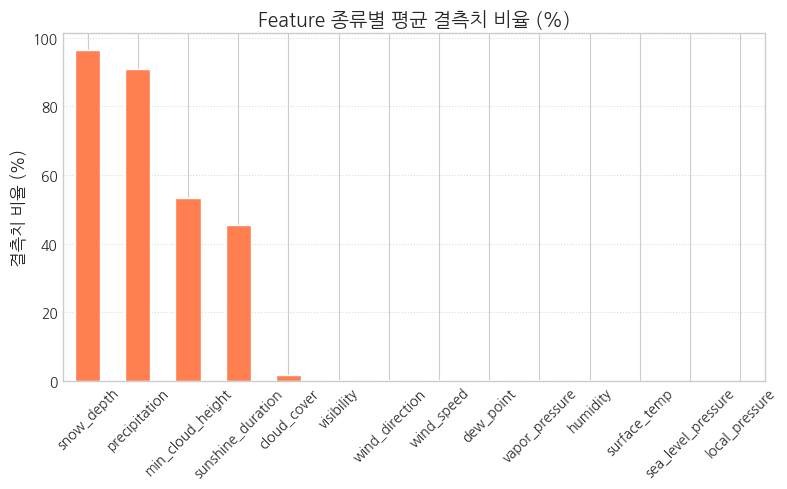

In [43]:
# In[4]: Missing Value Overview (-9999 포함)
print("\n--- 결측치 현황 분석 (NaN 및 -9999 값 고려) ---")
# 먼저 -9999 값을 np.nan으로 변환 (분석의 일관성을 위해)
# 단, 이 변환은 실제 결측치 처리 파일에서 수행하고 저장하는 것이 더 좋음.
# 여기서는 현황 파악을 위해 임시로 변환하여 확인.
df_for_missing_check = train_df.replace(-9999, np.nan)

prefixes = ['surface_temp', 'sunshine_duration', 'sea_level_pressure', 'vapor_pressure', 'local_pressure', 'dew_point', 'wind_speed', 'min_cloud_height', 'wind_direction', 'visibility', 'cloud_cover', 'precipitation', 'snow_depth', 'humidity']
hours = list(range(24))
columns = [f"{p}_{h}" for p in prefixes for h in hours]

missing_by_prefix = {}
for prefix in prefixes:
    cols_with_prefix = [col for col in df_for_missing_check.columns if col.startswith(prefix)]
    missing_ratio = df_for_missing_check[cols_with_prefix].isnull().mean().mean() * 100
    missing_by_prefix[prefix] = missing_ratio

missing_df = pd.Series(missing_by_prefix).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
missing_df.plot(kind='bar', color='coral')
plt.title('Feature 종류별 평균 결측치 비율 (%)', fontsize=14)
plt.ylabel('결측치 비율 (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()



--- Target 변수 간략 분포 확인 ---


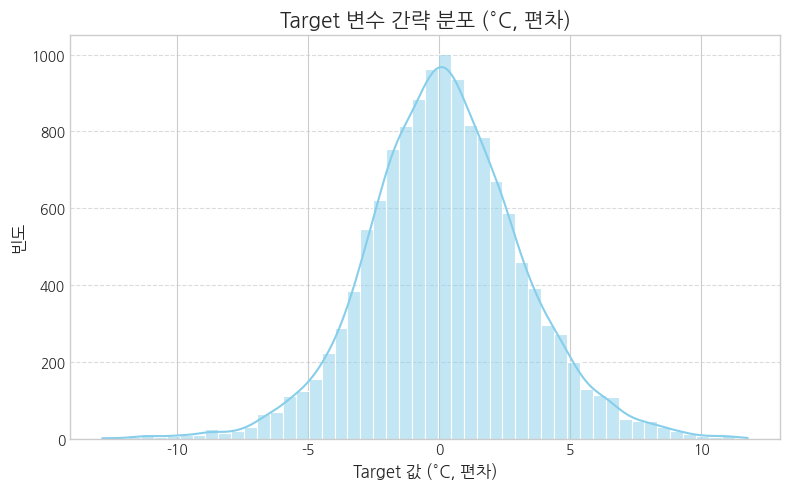


Target 변수 간략 기술 통계량:
count    13132.000000
mean         0.221979
std          2.960544
min        -12.864286
25%         -1.643052
50%          0.157143
75%          2.045536
max         11.778571
Name: target, dtype: float64

--- 초기 EDA (결측치 현황 중심) 완료 ---
다음 단계: `02_data_preprocessing_and_missing_value_treatment.ipynb`에서 결측치 처리 진행


In [44]:
# In[5]: Brief Overview of Target Variable
if 'target' in train_df.columns:
    print("\n--- Target 변수 간략 분포 확인 ---")
    target_unit = get_unit('target')
    plt.figure(figsize=(8, 5))
    # -9999가 target에도 있을 수 있다면 df_for_missing_check 사용
    sns.histplot(df_for_missing_check['target'].dropna(), kde=True, bins=50, color='skyblue')
    plt.title(f'Target 변수 간략 분포 {target_unit}', fontsize=15)
    plt.xlabel(f'Target 값 {target_unit}', fontsize=12)
    plt.ylabel('빈도', fontsize=12)
    plt.xticks(fontsize=10); plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print("\nTarget 변수 간략 기술 통계량:")
    print(df_for_missing_check['target'].describe())
else:
    print("\n경고: 'target' 컬럼이 train_df에 없어 간략 분포 확인을 건너<0xEB><0A><0x88>니다.")

print("\n--- 초기 EDA (결측치 현황 중심) 완료 ---")
print("다음 단계: `02_data_preprocessing_and_missing_value_treatment.ipynb`에서 결측치 처리 진행")